<a href="https://colab.research.google.com/github/Mahiliny23/ML-LogisticRegression/blob/main/Logistic_Regression_Social_Network_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Logistic Regression/Social_Network_Ads.csv')

In [30]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


The first four columns reasons (X) and 'Purchased' is result (y)

In [31]:
# Checking for NULL values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

No missing values.

In [32]:
# Checking for number of duplicated data in every column
df.duplicated().sum()

0

No duplicated rows.

In [33]:
df[['Age','EstimatedSalary']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.655,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.500,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0


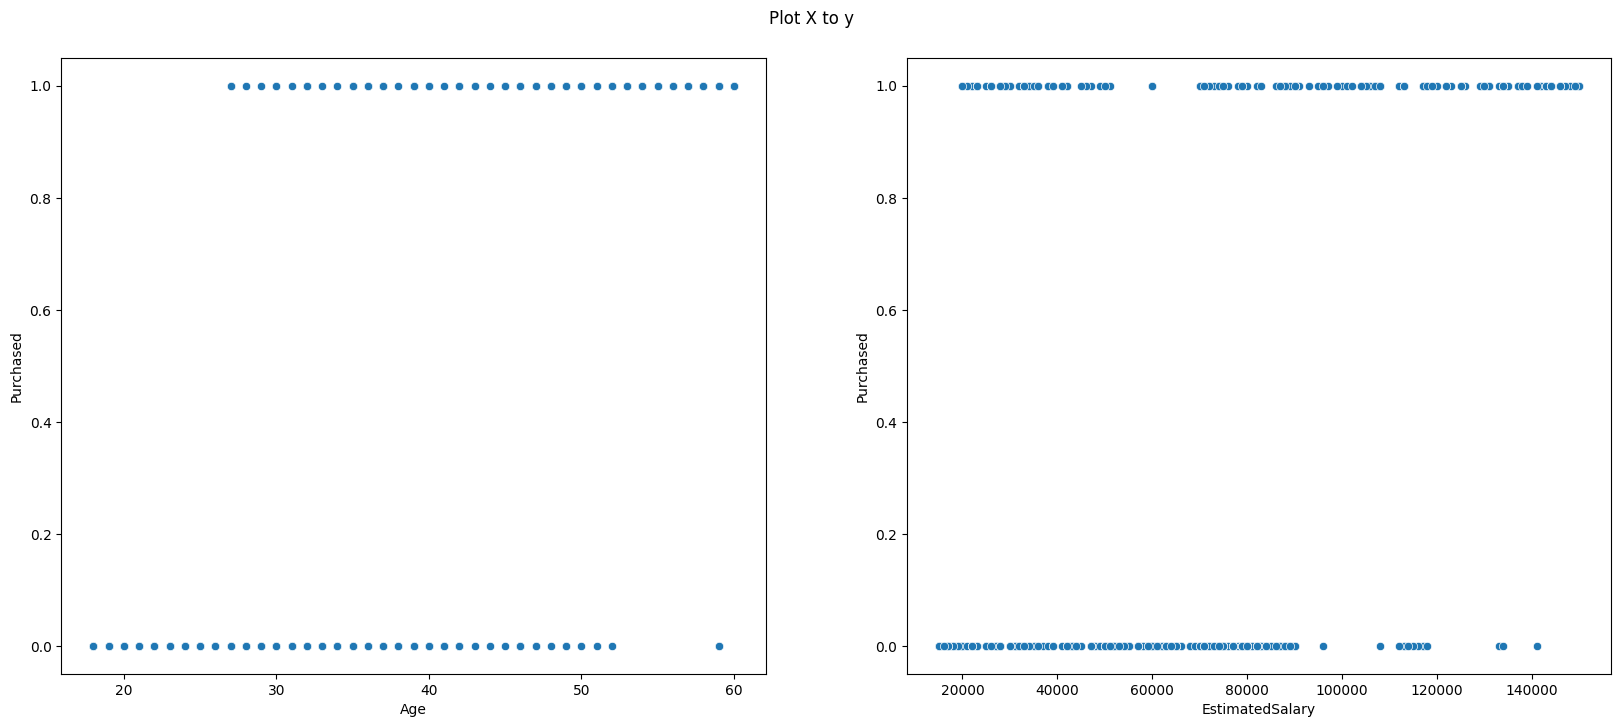

In [34]:
fig = plt.figure(figsize = (20,8))
gs = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

fig.suptitle(t = 'Plot X to y', y =0.94 )
sns.scatterplot(ax = ax1, data = df, x = 'Age', y = 'Purchased')
sns.scatterplot(ax = ax2, data = df, x = 'EstimatedSalary', y = 'Purchased')

plt.show()
#sns.pairplot(df, x_vars= ['Age', 'EstimatedSalary'], y_vars= ['Purchased'], height = 5)

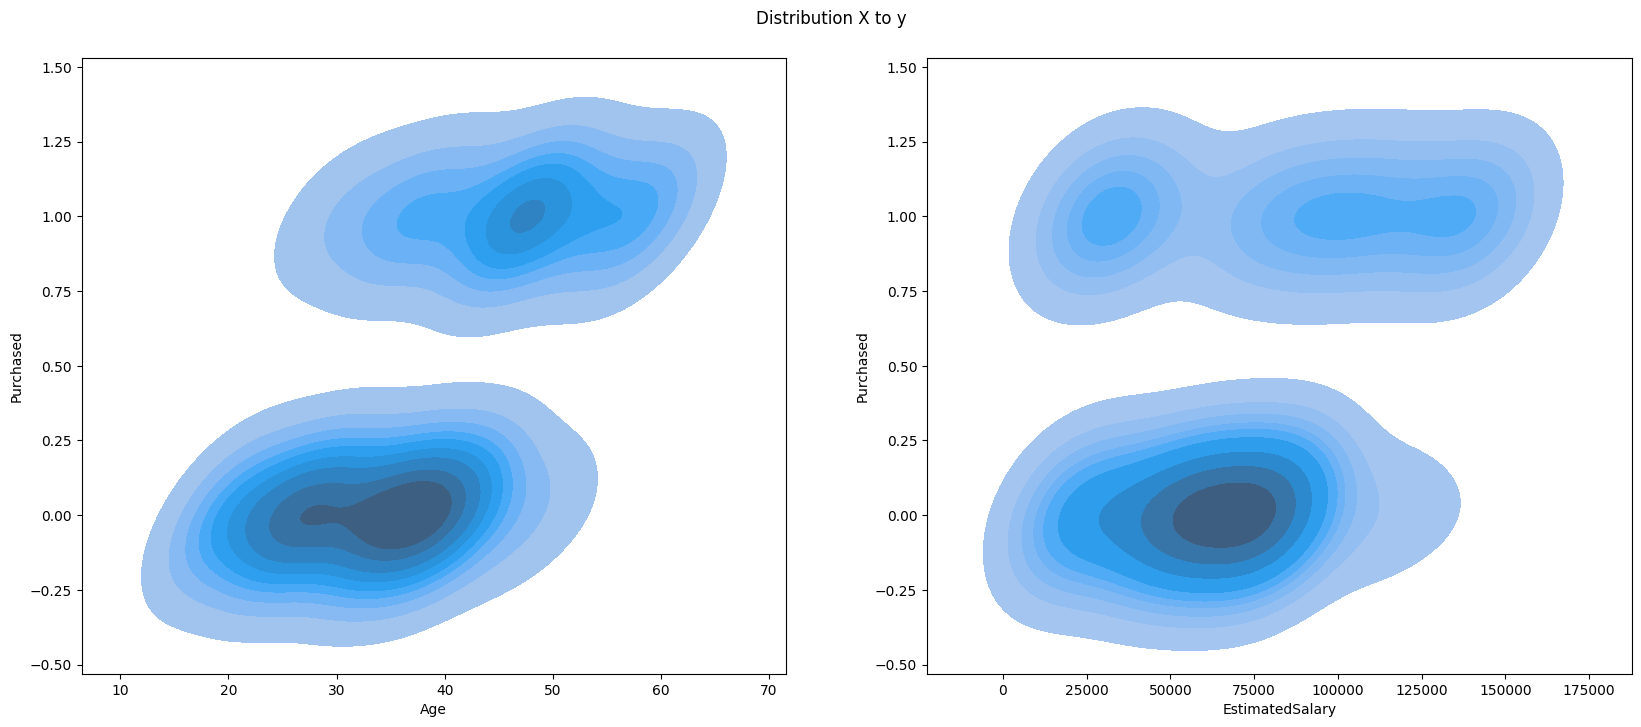

In [35]:
# Let's see distribution of data
fig = plt.figure(figsize = (20,8))
gs = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

fig.suptitle(t = 'Distribution X to y', y =0.94)
sns.kdeplot(ax = ax1, data = df, x = 'Age', y = 'Purchased', fill = True)
sns.kdeplot(ax = ax2, data = df, x = 'EstimatedSalary', y = 'Purchased', fill = True)

plt.show()


The data is divided into approximately two groups. Here, logistic Regression (Classification model) will fit our data.

<Axes: >

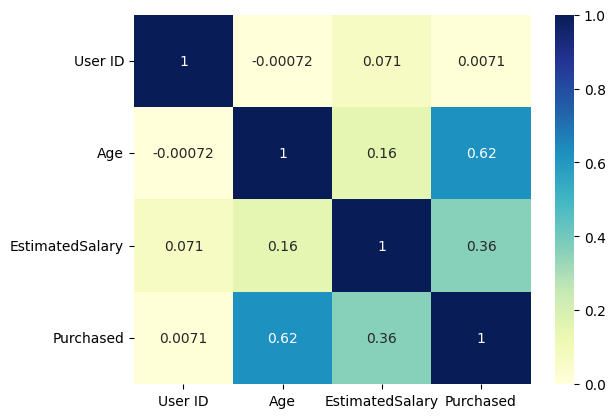

In [36]:
# Let's estimate the correlation between x and y
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)

In [37]:
# Separate columns to deal with them
X= df[['Age', 'EstimatedSalary']]
y = df[['Purchased']]

# Data Scaling

In [38]:
#We have two methods
#Standard Scaler helps to get standardized distribution, with a zero mean and standard deviation of one [commonly use]
#FORMULE:
#new_X = (X - mean) / std
#Min-Max scaler is another way of data scaling, where the minimum of feature is made equal to zero and the maximum of feature equal to one.


The Goal:

To minimize range between minimum and maximum value in each feature [column] to make all features in same range [between -1 to 1]

In [39]:
# Model without scaling
model_without_scaling = LogisticRegression().fit(X,y)

In [40]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

# Model with scaling
model_with_scaling = LogisticRegression().fit(X_scaled,y)

print(f'Score of model without scaling: {model_without_scaling.score(X,y)}')
print(f'Score of model with scaling: {model_with_scaling.score(X_scaled, y)}')

Score of model without scaling: 0.6425
Score of model with scaling: 0.84


**There is a big difference between model scores. So, data scaling is important.**

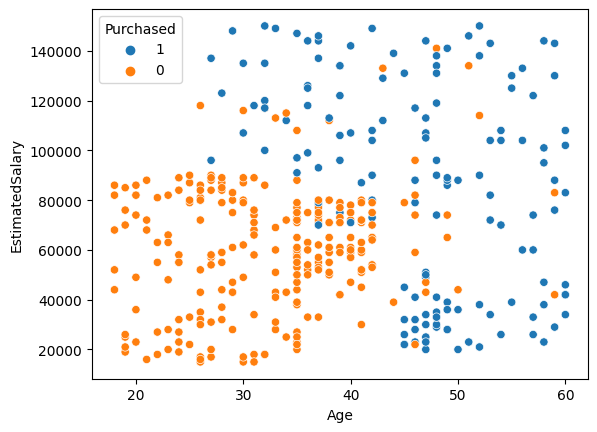

In [41]:
# Decision Boundary Display
sns.scatterplot(data =df, x = 'Age', y = 'EstimatedSalary', hue ='Purchased', hue_order =[1,0])
plt.show()

In [42]:
model = LogisticRegression().fit(X_scaled, y)
print(f'h(x) = {model.intercept_} + [{model.coef_[0,0]}]X1 + [{model.coef_[0,1]}]X2')


h(x) = [-1.08566951] + [2.265017499134798]X1 + [1.1335962319602912]X2


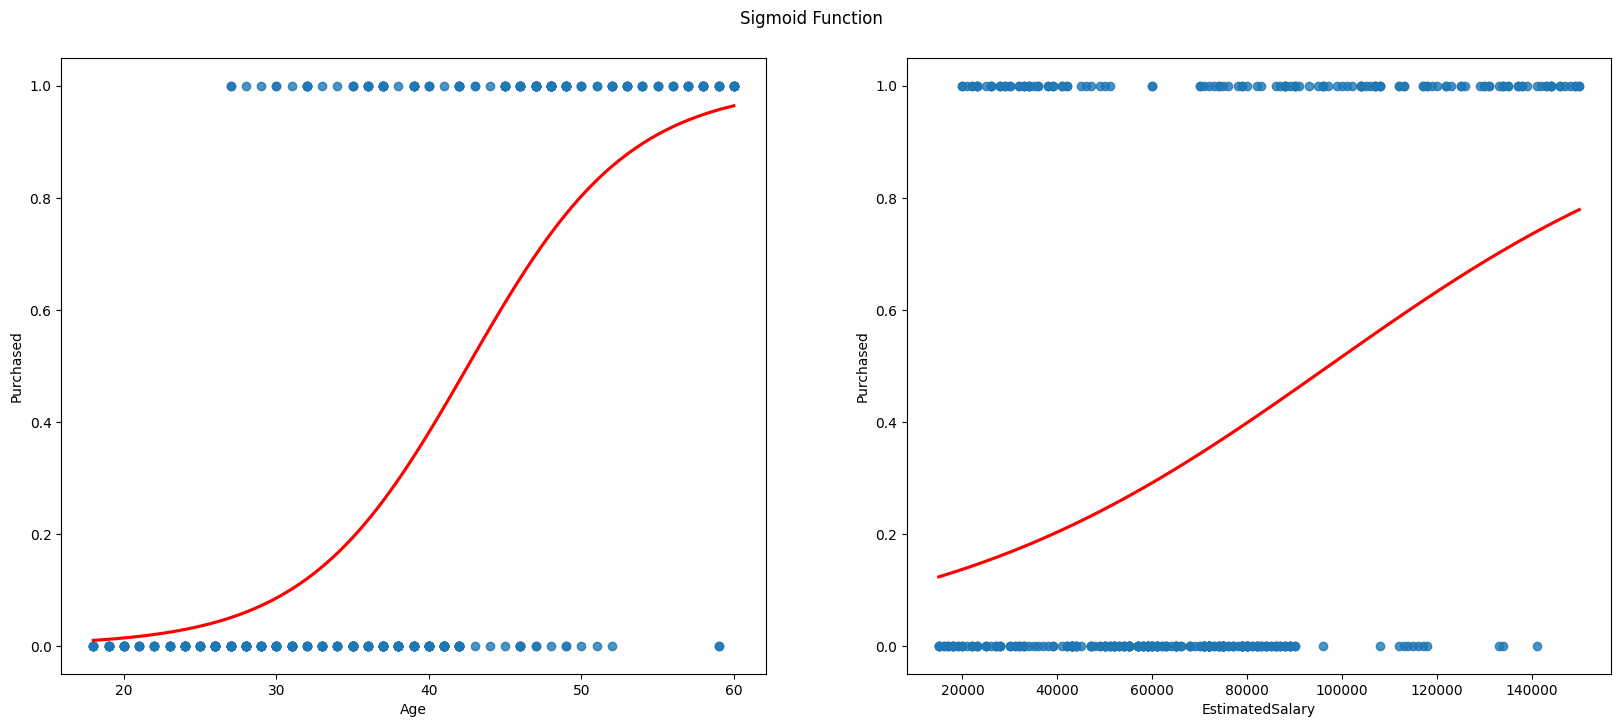

In [43]:
# Sigmoid function display
fig = plt.figure(figsize = (20,8))
fig.suptitle(t = 'Sigmoid Function', y = 0.94)

gs = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

sns.regplot(x='Age', y=y, data=df, logistic=True, ci=None,ax=ax1, line_kws={'color': 'red'})
sns.regplot(x='EstimatedSalary', y=y, data=df, logistic=True, ci=None, ax=ax2, line_kws={'color': 'red'})

plt.show()

In [44]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [45]:
# To see the scores of the model
print(f'Score of train dataset: {model.score(x_train,y_train)}')
print(f'Score of test dataset: {model.score(x_test, y_test)}')

Score of train dataset: 0.840625
Score of test dataset: 0.8625
